# 고급프로그래밍 L팀 

### 경영학과 이동훈 (2017270134)
### 세무학과 정동영 (2017940034)

#### 주제:
서울특별시 구 별 음식물 쓰레기 양 분석 및 예측

#### 설명:
서울특별시의 과거 구별 음식물 쓰레기양을 분석하고 음식물 쓰레기 배출량이 인구 수와 상관관계를 갖는지 분석하여 향후 어떤 구가 음식물쓰레기 배출량이 심각할지 예측

In [232]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

### 1. 음식물쓰레기 양을 기준으로 한 상위 5개 구 선정 

In [233]:
food = pd.read_excel('C:/Users/82109/Desktop/food.xls')

In [234]:
food.head()

,기간,자치구,발생량,처리방법,처리방법.1,처리방법.2,처리방법.3,처리방법.4,처리방법.5,처리방법.6
0,기간,자치구,발생량,재활용,재활용,재활용,재활용,재활용,소각,매립
1,기간,자치구,발생량,계,사료화,퇴비화,기타,하수병합,소각,매립
2,2010,서울시,3382.2,3382.2,1879,1423.3,79.9,-,-,-
3,2010,종로구,133.9,133.9,98.9,35,-,-,-,-
4,2010,중구,140,140,140,-,-,-,-,-


#### 1-1) for문을 통한 10년간 각 구별 음식물 쓰레기 총량 출력

In [235]:
food1=food[['기간','자치구','발생량']]
gu=pd.DataFrame({'자치구':['종로구', '중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})
a=['종로구', '중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']
b=[]
for i in a:
    c=food1[(food1['자치구']==i)]
    d=c['발생량'].sum()
    b.append(d)
b

[1163.6999999999998,
 1365.4,
 862.6,
 938.7,
 1101.7,
 1089.4,
 1043.2,
 1104.1,
 911.8000000000001,
 976.4,
 1662.0000000000002,
 923.5000000000001,
 891.1,
 1278.5,
 1308.8,
 1956.8999999999999,
 1153.8999999999999,
 734.7,
 1778.3999999999999,
 1097.1,
 1242.7999999999997,
 2025.0000000000002,
 3246.6,
 2420.0,
 1314.7000000000003]

#### 1-2) 음식물 쓰레기 양 기준 상위 5개 구 출력

In [236]:
gu['음식물 합']=b
gu1=gu.sort_values(by='음식물 합',ascending=False)
gu1.head(5)

,자치구,음식물 합
22,강남구,3246.6
23,송파구,2420.0
21,서초구,2025.0
15,강서구,1956.9
18,영등포구,1778.4


#### 1-3) 1-2에서 선정한 구를 바탕으로 구별 10년간 음식물 쓰레기 양 그래프 출력 

In [237]:
seo=food1[(food1['자치구']=='서초구')] 
gangnam=food1[(food1['자치구']=='강남구')]
young=food1[(food1['자치구']=='영등포구')]
song=food1[(food1['자치구']=='송파구')]
gangseo=food1[(food1['자치구']=='강서구')]

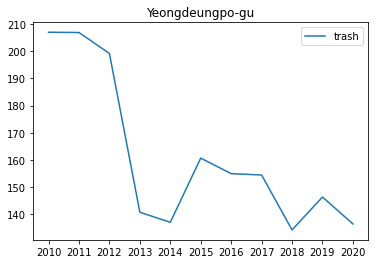

In [238]:
#영등포구
plt.title('Yeongdeungpo-gu')
plt.plot(young['기간'], young['발생량'], label='trash')
plt.legend()

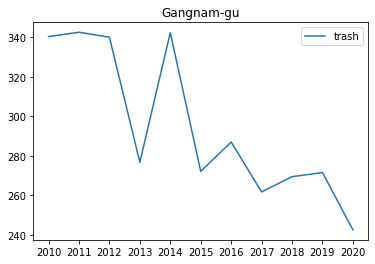

In [239]:
#강남구
plt.title('Gangnam-gu')
plt.plot(gangnam['기간'], gangnam['발생량'],label='trash')
plt.legend()

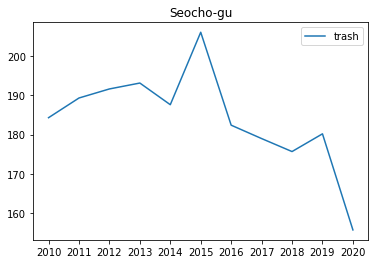

In [240]:
#서초구
plt.title('Seocho-gu')
plt.plot(seo['기간'], seo['발생량'],label='trash')
plt.legend()

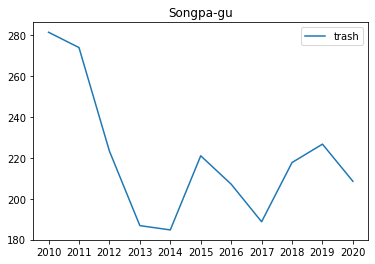

In [241]:
#송파구
plt.title('Songpa-gu')
plt.plot(song['기간'], song['발생량'],label='trash')
plt.legend()

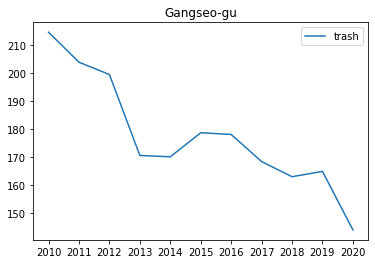

In [242]:
#강서구
plt.title('Gangseo-gu')
plt.plot(gangseo['기간'], gangseo['발생량'],label='trash')
plt.legend()

### 2. 음식물 쓰레기 양을 기준으로 선정한 5개 구의 인구 데이터 출력 

In [243]:
popul=pd.read_excel('C:/Users/82109/Desktop/Report.xls')

#### 2-1. 상위 5개 구의 인구 데이터만 추출

In [244]:
popul1=popul[(popul['자치구']=='강서구') |(popul['자치구']=='강남구')|(popul['자치구']=='송파구')|(popul['자치구']=='서초구')|(popul['자치구']=='영등포구')]
popul2=popul1[['기간','자치구','인구']] #연도별 각 구의 기간, 자치구, 인구 열만 추출
popul2.head()

,기간,자치구,인구
18,2010,강서구,580506
21,2010,영등포구,445648
24,2010,서초구,440021
25,2010,강남구,577070
26,2010,송파구,693144


In [245]:
# 연도별 각 구 행만 추출한 변수 생성
sc=popul2[(popul['자치구']=='서초구')] 
gn=popul2[(popul['자치구']=='강남구')]
ydp=popul2[(popul['자치구']=='영등포구')]
sn=popul2[(popul['자치구']=='송파구')]
gs=popul2[(popul['자치구']=='강서구')]

<ipython-input-245-b21a11ee4fbf>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sc=popul2[(popul['자치구']=='서초구')]
<ipython-input-245-b21a11ee4fbf>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gn=popul2[(popul['자치구']=='강남구')]
<ipython-input-245-b21a11ee4fbf>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ydp=popul2[(popul['자치구']=='영등포구')]
<ipython-input-245-b21a11ee4fbf>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sn=popul2[(popul['자치구']=='송파구')]
<ipython-input-245-b21a11ee4fbf>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gs=popul2[(popul['자치구']=='강서구')]


#### 2-2. 5개 구의 10년 간 인구 수 그래프 출력

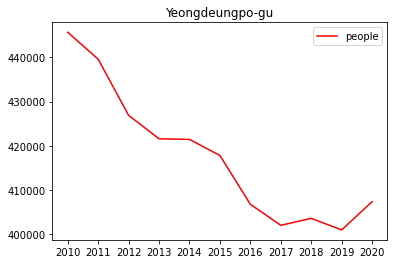

In [246]:
#영등포구
plt.title('Yeongdeungpo-gu')
plt.plot(ydp['기간'], ydp['인구'],color='red',label='people')
plt.legend()

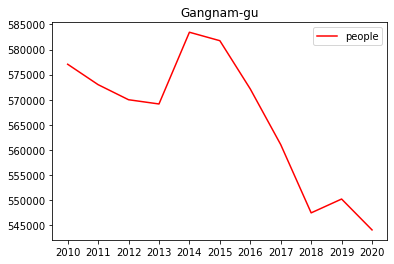

In [247]:
#강남구
plt.title('Gangnam-gu')
plt.plot(gn['기간'], gn['인구'],color='red',label='people')
plt.legend()

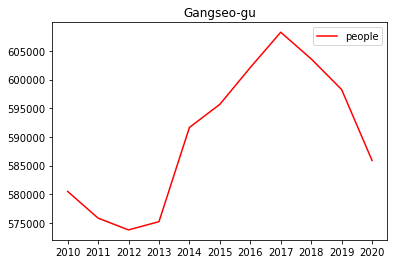

In [248]:
#강서구
plt.title('Gangseo-gu')
plt.plot(gs['기간'], gs['인구'],color='red',label='people')
plt.legend()

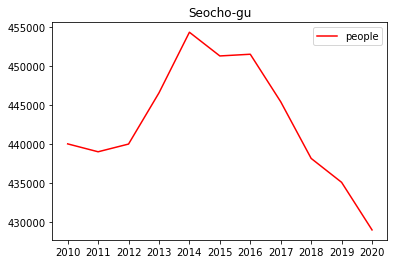

In [249]:
#서초구
plt.title('Seocho-gu')
plt.plot(sc['기간'], sc['인구'],color='red',label='people')
plt.legend()

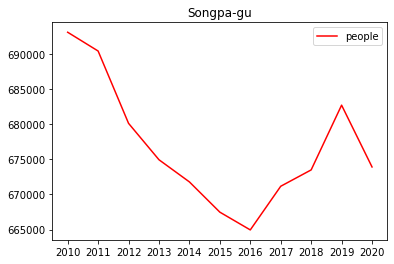

In [250]:
#송파구
plt.title('Songpa-gu')
plt.plot(sp['기간'], sp['인구'],color='red',label='people')
plt.legend()

## 3. 1, 2의 그래프 병합 

In [251]:
#음식물, 인구 총합 그래프 병합
popul1=popul[(popul['자치구']=='강서구') |(popul['자치구']=='강남구')|(popul['자치구']=='송파구')|(popul['자치구']=='서초구')|(popul['자치구']=='영등포구')]
popul2=popul1[['기간','자치구','인구']]
sc=popul2[(popul['자치구']=='서초구')] 
gn=popul2[(popul['자치구']=='강남구')]
ydp=popul2[(popul['자치구']=='영등포구')]
sp=popul2[(popul['자치구']=='송파구')]
gs=popul2[(popul['자치구']=='강서구')]

<ipython-input-251-0cde3d53dbbb>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sc=popul2[(popul['자치구']=='서초구')]
<ipython-input-251-0cde3d53dbbb>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gn=popul2[(popul['자치구']=='강남구')]
<ipython-input-251-0cde3d53dbbb>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ydp=popul2[(popul['자치구']=='영등포구')]
<ipython-input-251-0cde3d53dbbb>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sp=popul2[(popul['자치구']=='송파구')]
<ipython-input-251-0cde3d53dbbb>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gs=popul2[(popul['자치구']=='강서구')]


#### 영등포구의 음식물쓰레기 양과 인구 수 그래프 

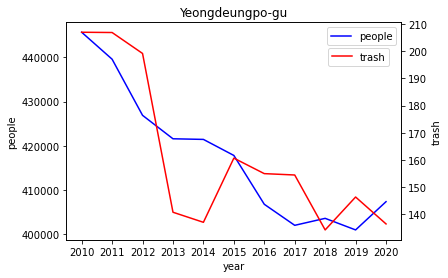

In [252]:
##풀이출처: https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots()
ax.plot(ydp['기간'], ydp['인구'], color='blue',label='people')
plt.legend()
ax.set_xlabel("year")
ax.set_ylabel('people')
ax2=ax.twinx()
ax2.plot(young['기간'],young['발생량'],color ='red',label='trash')
ax2.set_ylabel('trash')
plt.legend()
plt.title("Yeongdeungpo-gu")
plt.legend(loc=(0.78,0.8))
plt.show()

#### 강남구의 음식물쓰레기 양과 인구 수 그래프 

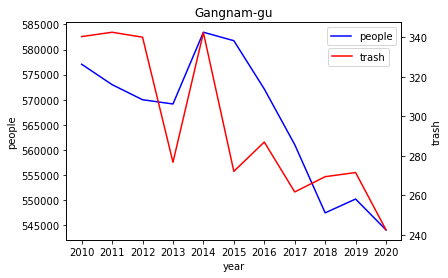

In [253]:
fig,ax = plt.subplots()
ax.plot(gn['기간'], gn['인구'], color='blue',label='people')
plt.legend()
ax.set_xlabel("year")
ax.set_ylabel('people')
ax2=ax.twinx()
ax2.plot(gangnam['기간'],gangnam['발생량'],color ='red',label='trash')
plt.legend()
ax2.set_ylabel('trash')
plt.title("Gangnam-gu")
plt.legend(loc=(0.78,0.8))
plt.show()

#### 서초구의 음식물쓰레기 양과 인구 수 그래프 

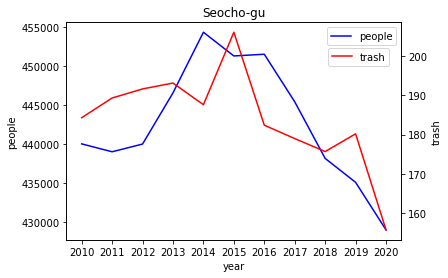

In [254]:
fig,ax = plt.subplots()
ax.plot(sc['기간'], sc['인구'], color='blue',label='people')
plt.legend()
ax.set_xlabel("year")
ax.set_ylabel('people')
ax2=ax.twinx()
ax2.plot(seo['기간'],seo['발생량'],color ='red',label='trash')
plt.legend()
ax2.set_ylabel('trash')
plt.title("Seocho-gu")
plt.legend(loc=(0.78,0.8))
plt.show()

#### 송파구의 음식물쓰레기 양과 인구 수 그래프 

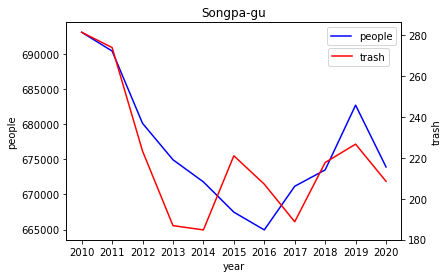

In [255]:
fig,ax = plt.subplots()
ax.plot(sp['기간'], sp['인구'], color='blue',label='people')
plt.legend()
ax.set_xlabel("year")
ax.set_ylabel('people')
ax2=ax.twinx()
ax2.plot(song['기간'],song['발생량'],color ='red',label='trash')
plt.legend()
ax2.set_ylabel('trash')
plt.title("Songpa-gu")
plt.legend(loc=(0.78,0.8))
plt.show()

#### 강서구의 음식물쓰레기 양과 인구 수 그래프 

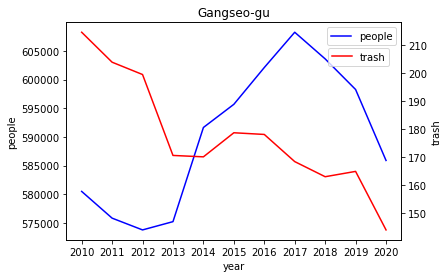

In [256]:
fig,ax = plt.subplots()
ax.plot(gs['기간'], gs['인구'], color='blue',label='people')
plt.legend()
ax.set_xlabel("year")
ax.set_ylabel('people')
ax2=ax.twinx()
ax2.plot(gangseo['기간'],gangseo['발생량'],color ='red',label='trash')
plt.legend()
ax2.set_ylabel('trash')
plt.title('Gangseo-gu')
plt.legend(loc=(0.78,0.8))
plt.show()

##### 분석 결과, 상위 5개 구 모두 음식물 쓰레기 양과 인구 수의 그래프 방향이 비슷하게 흘러가고 있음을 보인다

## 4. 음식물 증감량에 따른 상위 5개 구 선정

In [257]:
#음식물 증감
food.head()

,기간,자치구,발생량,처리방법,처리방법.1,처리방법.2,처리방법.3,처리방법.4,처리방법.5,처리방법.6
0,기간,자치구,발생량,재활용,재활용,재활용,재활용,재활용,소각,매립
1,기간,자치구,발생량,계,사료화,퇴비화,기타,하수병합,소각,매립
2,2010,서울시,3382.2,3382.2,1879,1423.3,79.9,-,-,-
3,2010,종로구,133.9,133.9,98.9,35,-,-,-,-
4,2010,중구,140,140,140,-,-,-,-,-


#### 4-1. 연도별 각 구의 음식물 쓰레기 증감 퍼센트 구하기

In [258]:
#1 연도, 구 이름, 발생량 제외 모든 열 삭제
df = pd.DataFrame(food[['기간','자치구','발생량']])
df_new = df[2:288]
df_new.head()

,기간,자치구,발생량
2,2010,서울시,3382.2
3,2010,종로구,133.9
4,2010,중구,140
5,2010,용산구,95.8
6,2010,성동구,85.1


In [259]:
#2.연도별 각 구 의 증감 퍼센트 구하기
A = df_new['발생량']
A
Y=[]
for x in range(2,262):
    result = round(A[x+26] / A[x] * 100,3)
    Y.append(result)
print(Y)
Y.insert(0,100)
Y.insert(0,100)
Y.insert(0,100)
Y.insert(0,100)
Y.insert(0,100)
Y.insert(0,100)
Y.insert(0,100)
Y.insert(0,100)
Y.insert(0,100)
Y.insert(0,100)
Y.insert(0,100)
Y.insert(0,100)
Y.insert(0,100)
Y.insert(0,100)
Y.insert(0,100)
Y.insert(0,100)
Y.insert(0,100)
Y.insert(0,100)
Y.insert(0,100)
Y.insert(0,100)
Y.insert(0,100)
Y.insert(0,100)
Y.insert(0,100)
Y.insert(0,100)
Y.insert(0,100)
Y.insert(0,100)
Y.insert(0,100)
Y.insert(0,100)

len(Y)

[98.971, 77.072, 101.929, 88.413, 108.813, 104.795, 103.939, 94.726, 107.951, 99.774, 95.427, 103.0, 102.554, 92.763, 101.635, 86.437, 95.016, 98.148, 99.625, 99.952, 125.784, 94.219, 102.713, 100.646, 97.336, 106.509, 98.934, 105.62, 103.644, 97.639, 93.413, 107.626, 105.474, 106.332, 99.622, 101.586, 101.171, 100.546, 91.034, 104.61, 98.471, 101.426, 97.843, 107.17, 94.486, 96.278, 106.094, 100.829, 101.215, 99.27, 81.496, 95.952, 92.702, 106.055, 88.844, 97.34, 100.231, 87.6, 98.403, 105.339, 99.526, 97.77, 96.526, 98.552, 115.869, 100.226, 100.49, 102.221, 85.521, 95.687, 89.92, 70.683, 92.515, 83.059, 100.783, 81.412, 83.654, 100.579, 103.619, 103.374, 98.935, 95.776, 91.926, 105.662, 106.592, 99.805, 104.19, 100.0, 106.979, 103.98, 104.604, 102.593, 107.154, 86.459, 99.707, 107.268, 100.885, 97.372, 108.749, 117.921, 97.152, 123.663, 98.876, 103.125, 99.519, 81.004, 98.308, 100.908, 115.182, 99.713, 100.666, 97.266, 97.715, 101.026, 98.777, 95.878, 105.192, 90.879, 108.118, 98.15

288

In [260]:
#3. 2의 자료와 각 구를 매칭시켜 데이터프레임으로 만들기
percentage = pd.DataFrame(Y)
df_real=pd.concat([df_new, percentage],axis = 1)
df_real.rename(columns={0:'증가량'},inplace=True)
df_real.head()
#출처 : https://yganalyst.github.io/data_handling/Pd_12/

,기간,자치구,발생량,증가량
0,NaN,NaN,NaN,100.0
1,NaN,NaN,NaN,100.0
2,2010,서울시,3382.2,100.0
3,2010,종로구,133.9,100.0
4,2010,중구,140,100.0


#### 4-2. 4-1을 바탕으로 음식물 쓰레기 증감량 기준 상위 5개 구 선정

In [261]:
# 각 구의 음식물 쓰레기 증감률 총합 구하기
a=['종로구', '중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']
b=[]
for i in a:
    c=q[(q['자치구']==i)]
    d=c['증가량'].sum()
    b.append(d)
b

[1052.3519999999999,
 1053.181,
 1061.223,
 1093.438,
 1087.5230000000001,
 1100.1940000000002,
 1089.972,
 1088.9479999999999,
 1075.4129999999998,
 1071.3220000000001,
 1071.454,
 1102.442,
 1065.564,
 1068.173,
 1048.052,
 1062.654,
 1074.977,
 1063.7849999999999,
 1066.803,
 1104.002,
 1073.42,
 1085.527,
 1074.212,
 1077.314,
 1094.173]

In [262]:
#내림차순 정렬
gu=pd.DataFrame({'자치구':['종로구', '중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})
gu['음식물 증가율 합']=b
gu1=gu.sort_values(by='음식물 증가율 합',ascending=False)
gu1.head(5)

,자치구,음식물 증가율 합
19,동작구,1104.002
11,은평구,1102.442
5,동대문구,1100.194
24,강동구,1094.173
3,성동구,1093.438


#### 4-3. 선정된 5개 구의 10년간 음식물쓰레기 증감률을 그래프로 출력 

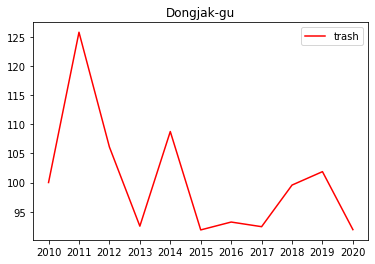

In [263]:
#동작구
dfdf_dj = dfdf.loc[['동작구']]
plt.title('Dongjak-gu')
plt.plot(dfdf_dj['기간'], dfdf_dj['증가량'],color='red',label='trash')
plt.legend()

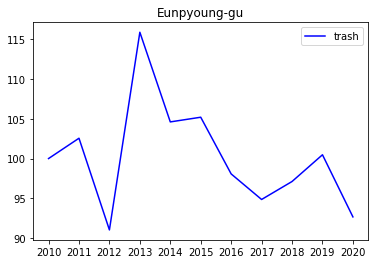

In [264]:
#은평구
dfdf_ep = dfdf.loc[["은평구"]]
plt.title('Eunpyoung-gu')
plt.plot(dfdf_ep['기간'], dfdf_ep['증가량'],color='blue',label='trash')
plt.legend()

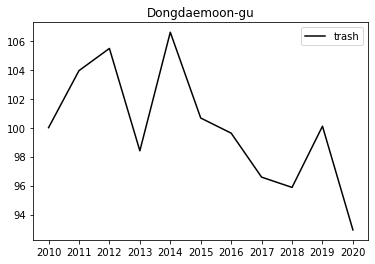

In [265]:
#동대문구
dfdf_ddm = dfdf.loc[['동대문구']]
plt.title('Dongdaemoon-gu')
plt.plot(dfdf_ddm['기간'], dfdf_ddm['증가량'],color='black',label='trash')
plt.legend()

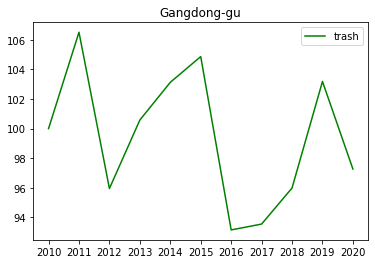

In [266]:
#강동구
dfdf_gd = dfdf.loc[['강동구']]
plt.title('Gangdong-gu')
plt.plot(dfdf_gd['기간'], dfdf_gd['증가량'],color='green',label='trash')
plt.legend()

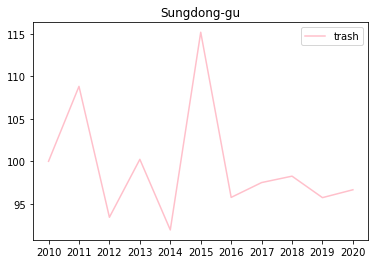

In [267]:
#성동구
dfdf_sd = dfdf.loc[['성동구']]
plt.title('Sungdong-gu')
plt.plot(dfdf_sd['기간'], dfdf_sd['증가량'],color='pink',label='trash')
plt.legend()

## 5. 음식물 쓰레기 증감률에 따라 선정한 5개 구의 인구 증감률 데이터 출력

In [268]:
popul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,인구밀도,인구밀도.1,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,인구밀도,인구밀도,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,인구밀도(명/㎢),면적(㎢),세대당인구,65세이상고령자
2,2010,합계,4224181,10575447,5236742,5338705,10312545,5111259,5201286,262902,125483,137419,17473,605.25,2.44,1007572
3,2010,종로구,77621,179362,89252,90110,170578,85182,85396,8784,4070,4714,7502,23.91,2.2,22458
4,2010,중구,61468,141200,70908,70292,132822,66879,65943,8378,4029,4349,14177,9.96,2.16,17504


#### 5-1. 선정된 5개 구의 인구 데이터 출력

In [269]:
#상위 5개 구의 데이터만 추출
popul1=popul[(popul['자치구']=='동작구') |(popul['자치구']=='은평구')|(popul['자치구']=='동대문구')|(popul['자치구']=='강동구')|(popul['자치구']=='성동구')]

#상위 5개 구의 연도, 자치구, 인구 수 열만 추출
popul2=popul1[['기간','자치구','인구']] 
popul2.head()

,기간,자치구,인구
6,2010,성동구,316892
8,2010,동대문구,379343
14,2010,은평구,492925
22,2010,동작구,413814
27,2010,강동구,496939


In [270]:
# 연도별 각 구 행만 추출한 변수 생성
dongjack=popul2[(popul['자치구']=='동작구')] 
eun=popul2[(popul['자치구']=='은평구')]
dongdae=popul2[(popul['자치구']=='동대문구')]
gang=popul2[(popul['자치구']=='강동구')]
sung=popul2[(popul['자치구']=='성동구')]

<ipython-input-270-d7ca113b26aa>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dongjack=popul2[(popul['자치구']=='동작구')]
<ipython-input-270-d7ca113b26aa>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  eun=popul2[(popul['자치구']=='은평구')]
<ipython-input-270-d7ca113b26aa>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dongdae=popul2[(popul['자치구']=='동대문구')]
<ipython-input-270-d7ca113b26aa>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gang=popul2[(popul['자치구']=='강동구')]
<ipython-input-270-d7ca113b26aa>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sung=popul2[(popul['자치구']=='성동구')]


#### 5-2. 5개 구의 인구 증감률 계산

In [271]:
#각 구의 인구 증가율을 계산하고 새로운 열로 추가 
dongjack['차이']=dongjack.인구.diff().fillna(0)
dongjack['ratio']=dongjack["차이"]*1/100

eun['차이']=eun.인구.diff().fillna(0)
eun['ratio']=eun["차이"]*1/100

dongdae['차이']=dongdae.인구.diff().fillna(0)
dongdae['ratio']=dongdae["차이"]*1/100

gang['차이']=gang.인구.diff().fillna(0)
gang['ratio']=gang["차이"]*1/100

sung['차이']=sung.인구.diff().fillna(0)
sung['ratio']=sung["차이"]*1/100

#출처:https://jusths.tistory.com/38


<ipython-input-271-3a03ac2bd28c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dongjack['차이']=dongjack.인구.diff().fillna(0)
<ipython-input-271-3a03ac2bd28c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dongjack['ratio']=dongjack["차이"]*1/100
<ipython-input-271-3a03ac2bd28c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

#### 5-3. 5개 구의 10년간 인구 증감률 그래프 출력 

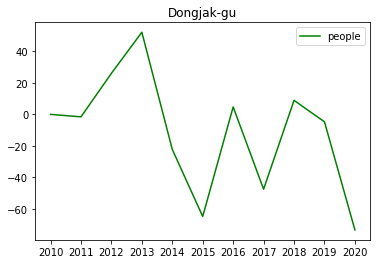

In [272]:
#동작구
plt.title('Dongjak-gu')
plt.plot(dongjack['기간'], dongjack['ratio'], color='green',label='people')
plt.legend()

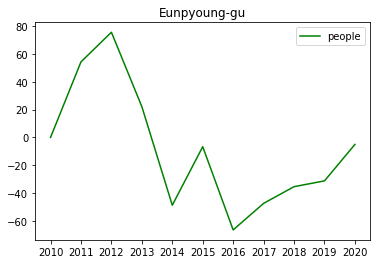

In [273]:
#은평구
plt.title('Eunpyoung-gu')
plt.plot(eun['기간'], eun['ratio'], color='green',label='people')
plt.legend()

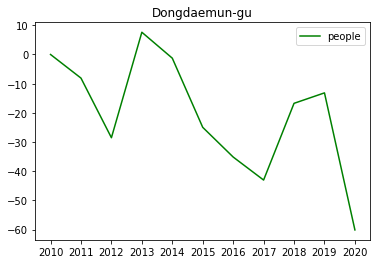

In [274]:
#동대문구
plt.title('Dongdaemun-gu')
plt.plot(dongdae['기간'], dongdae['ratio'],color='green',label='people')
plt.legend()

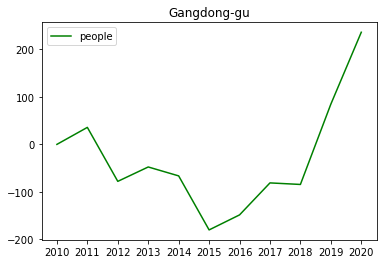

In [275]:
#강동구
plt.title('Gangdong-gu')
plt.plot(gang['기간'], gang['ratio'],color='green',label='people')
plt.legend()

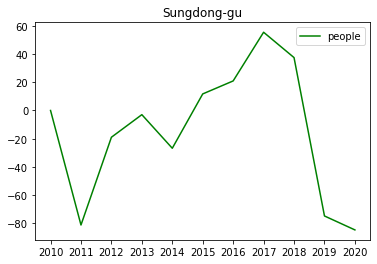

In [276]:
#성동구
plt.title('Sungdong-gu')
plt.plot(sung['기간'], sung['ratio'],color='green',label='people')
plt.legend()

## 6. 음식물 쓰레기 증감 그래프와 인구 증감 그래프 병합

#### 동작구의 음식물 쓰레기 증감 그래프와 인구 증감그래프

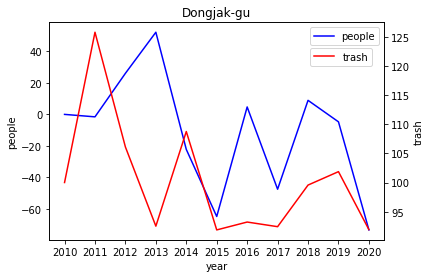

In [277]:
##풀이출처: https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots()
ax.plot(dongjack['기간'], dongjack['ratio'], color='blue',label='people')
plt.legend()
ax.set_xlabel("year")
ax.set_ylabel('people')
ax2=ax.twinx()
ax2.plot(dfdf_dj['기간'],dfdf_dj['증가량'],color ='red',label='trash')
ax2.set_ylabel('trash')
plt.title("Dongjak-gu")
plt.legend()
plt.legend(loc=(0.78,0.8))
plt.show()

#### 은평구의 음식물 쓰레기 증감 그래프와 인구 증감그래프

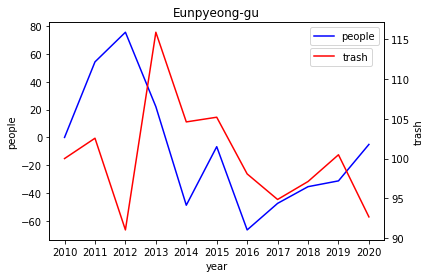

In [278]:
fig,ax = plt.subplots()
ax.plot(eun['기간'], eun['ratio'], color='blue',label='people')
plt.legend()
ax.set_xlabel("year")
ax.set_ylabel('people')
ax2=ax.twinx()
ax2.plot(dfdf_ep['기간'],dfdf_ep['증가량'],color ='red', label='trash')
ax2.set_ylabel('trash')
plt.title("Eunpyeong-gu")
plt.legend(loc=(0.78,0.8))
plt.show()


#### 동대문구의 음식물 쓰레기 증감 그래프와 인구 증감그래프

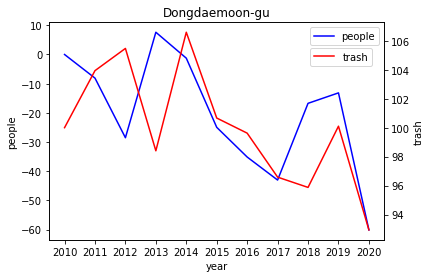

In [279]:
fig,ax = plt.subplots()
ax.plot(dongdae['기간'], dongdae['ratio'], color='blue', label='people')
plt.legend()
ax.set_xlabel("year")
ax.set_ylabel('people')
ax2=ax.twinx()
ax2.plot(dfdf_ddm['기간'],dfdf_ddm['증가량'],color ='red',label='trash')
plt.legend()
ax2.set_ylabel('trash')
plt.title("Dongdaemoon-gu")
plt.legend(loc=(0.78,0.8))
plt.show()

#### 강동구의 음식물 쓰레기 증감 그래프와 인구 증감그래프

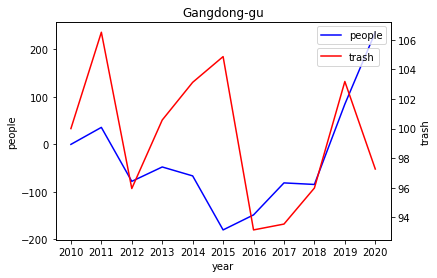

In [280]:
fig,ax = plt.subplots()
ax.plot(gang['기간'], gang['ratio'], color='blue',label='people')
plt.legend(loc=(0.78,0.9))
ax.set_xlabel("year")
ax.set_ylabel('people')
ax2=ax.twinx()
ax2.plot(dfdf_gd['기간'],dfdf_gd['증가량'],color ='red',label='trash')
plt.legend()
ax2.set_ylabel('trash')
plt.title("Gangdong-gu")
plt.legend(loc=(0.78,0.8))
plt.show()

#### 성동구의 음식물 쓰레기 증감 그래프와 인구 증감그래프

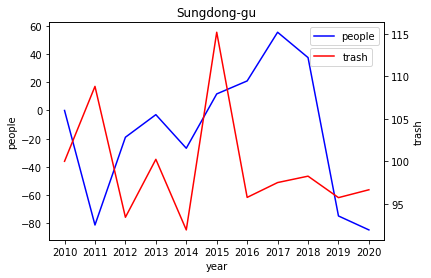

In [281]:
fig,ax = plt.subplots()
ax.plot(sung['기간'], sung['ratio'], color='blue', label='people')
plt.legend()
ax.set_xlabel("year")
ax.set_ylabel('people')
ax2=ax.twinx()
ax2.plot(dfdf_sd['기간'],dfdf_sd['증가량'],color ='red', label='trash')
ax2.set_ylabel('trash')
plt.title("Sungdong-gu")
plt.legend()
plt.legend(loc=(0.78,0.8))
plt.show()

##### 분석결과, 동작구와 성동구를 제외한 나머지 강동구, 동대문구, 은평구의 그래프 방향이 비슷하게 흘러가고 있음을 알 수 있다.

## 7. 음식물 쓰레기 양과 인구 수를 기준으로 회귀분석 실시

In [282]:
#음식물, 인구 총합 회귀분석
popul1=popul[(popul['자치구']=='강서구') |(popul['자치구']=='강남구')|(popul['자치구']=='송파구')|(popul['자치구']=='서초구')|(popul['자치구']=='영등포구')]
popul2=popul1[['기간','자치구','인구']] #연도별 각 구의 기간, 자치구, 인구 열만 추출
food1=food[(food['자치구']=='강서구') |(food['자치구']=='강남구')|(food['자치구']=='송파구')|(food['자치구']=='서초구')|(food['자치구']=='영등포구')]
food2=food1[['기간','자치구','발생량']] #연도별 기간, 자치구, 음식물 쓰레기 발생량 추출

In [283]:
total=pd.merge(popul2, food2)
#출처: https://engineer-mole.tistory.com/208
total=total.drop([0,1,2,3])
total.head()

,기간,자치구,인구,발생량
4,2010,송파구,693144,281.5
5,2011,강서구,575846,204
6,2011,영등포구,439555,206.9
7,2011,서초구,439012,189.3
8,2011,강남구,573003,342.5


In [284]:
x= total.iloc[:,2:3].values 
y = total.iloc[:,3:4].values 

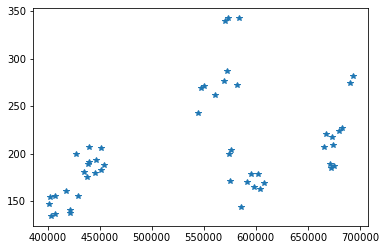

In [285]:
plt.plot(x,y,'*')

In [286]:
#using 80% of the data as training set
x_train, x_test,y_train, y_test =  train_test_split(x,y,test_size = 0.2, random_state=0)
regressor = LinearRegression()
x_train.reshape(-1,1)
regressor.fit(x_train, y_train)
x_train = x_train.reshape(-1,1)
regressor.fit(x_train, y_train)
regressor.predict(x_test)

array([[210.82372684],
       [211.54008476],
       [235.81527049],
       [175.11481156],
       [180.1459765 ],
       [182.90450981],
       [236.41478062],
       [171.46198775],
       [217.75684983],
       [211.0234093 ],
       [181.49863425]])

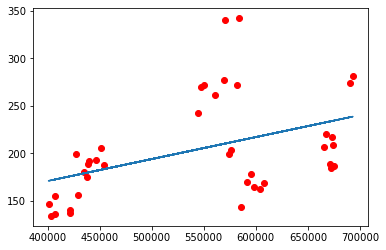

In [287]:
plt.scatter(x_train,y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train))

##### 분석결과, 음식물 쓰레기 양과 인구 수의 경우 양의 상관관계를 가지고 있지만 그 분포가 다소 불규칙적인 모습을 보이고 있다.

## 8. 음식물 쓰레기 증감률과 인구 증감률 회귀분석 실시

In [288]:
gugu=pd.concat([dongjack, eun,dongdae, gang,sung])
gugu.head()

,기간,자치구,인구,차이,ratio
22,2010,동작구,413814,0,0.00
48,2011,동작구,413658,-156,-1.56
74,2012,동작구,416268,2610,26.10
100,2013,동작구,421487,5219,52.19
126,2014,동작구,419261,-2226,-22.26


In [289]:
df_real1=df_real[(df_real['자치구']=='동작구') |(df_real['자치구']=='은평구')|(df_real['자치구']=='동대문구')|(df_real['자치구']=='강동구')|(df_real['자치구']=='성동구')]
df_real1.head()

,기간,자치구,발생량,증가량
6,2010,성동구,85.1,100.0
8,2010,동대문구,91.4,100.0
14,2010,은평구,78.3,100.0
22,2010,동작구,86.1,100.0
27,2010,강동구,118.3,100.0


In [290]:
gugu['Ratio']=gugu['ratio']+100

In [291]:
trash2=pd.concat([dfdf_dj, dfdf_gn,dfdf_sp, dfdf_ka,dfdf_ydp])
total2=pd.merge(df_real1,gugu)
total2=total2.drop([0,1,2,3,4])
total2=total2.drop(['발생량','인구','차이','ratio'], axis=1)
total2.head()

,기간,자치구,증가량,Ratio
5,2011,성동구,108.813,18.75
6,2011,동대문구,103.939,91.91
7,2011,은평구,102.554,154.25
8,2011,동작구,125.784,98.44
9,2011,강동구,106.509,135.77


In [292]:
x1= total2.iloc[:,2:3].values 
y1 = total2.iloc[:,3:4].values 

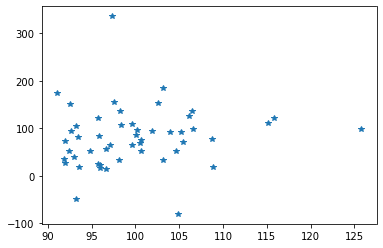

In [293]:
plt.plot(x1,y1,'*')

In [294]:
#using 80% of the data as training set
x_train1, x_test1,y_train1, y_test1 =  train_test_split(x1,y1,test_size = 0.2, random_state=0)
regressor = LinearRegression()
x_train1.reshape(-1,1)
regressor.fit(x_train1, y_train1)
x_train1 = x_train1.reshape(-1,1)
regressor.fit(x_train1, y_train1)
regressor.predict(x_test1)

array([[72.08246796],
       [76.18532815],
       [77.63237203],
       [77.53025569],
       [79.47125765],
       [75.92093392],
       [77.10358356],
       [74.74540867],
       [81.55949712],
       [82.60203366]])

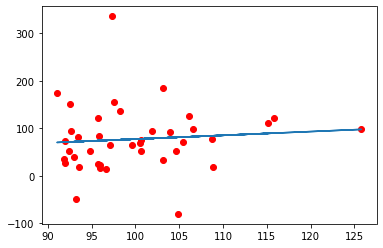

In [295]:
plt.scatter(x_train1,y_train1, color = 'red')
plt.plot(x_train1, regressor.predict(x_train1))

##### 분석결과, 음식물 쓰레기 증감률과 인구 증감률 경우 양의 상관관계를 가지고 있으며,  7에서 실시한 회귀분석 그래프에 비해 비교적 회귀선에 모여있는 모습을 보이고 있다.

## 9. 최종 결과

#### 음식물 쓰레기 양과 인구 수의 상관관계는 음식물 쓰레기 증감률과 인구 증감률에 비해 낮은 상관관계를 가지고 있다. 따라서 음식물 쓰레기 증감률과 인구 증감률을 기준으로 하여 향후 음식물 쓰레기 배출량이 증가할 것으로 보이는 구는 근 5년간 지속적인 인구 증가율을 보인 강동구이다.

## 10. 목표달성률 및 아쉬운 점

#### 목표까지 80% 정도 달성했다. 초기에 생각했던 구성에 따라 분석을 하고 결과까지 도출하는 과정이 원활하게 이루어졌지만, 다소 아쉬웠던 점이 있었기 때문이다.

#### 우선 산출된 결과가 분석을 실시하기 전의 예상과 달랐던 부분이다. 인구 수가 음식물 쓰레기의 양과 상관관계가 있을 것이라고 예상을 하며 그래프를 그리고 회귀분석을 실시했다. 그래프에서는 인구 수와 음식물 쓰레기의 양이 어느정도 비슷하게 움직이는 모습을 보였지만, 회귀분석에서는 분도가 다소 불규칙한 양상을 보이면서 인구와 음식물 쓰레기양의 상관관계를 설명하기에 부족한 모습을 보였다. 이러한 이유로 처음에 생각했던 음식물 쓰레기 양이 향후 증가할 거 같은 구를 선정하는데 충분한 근거를 얻지 못하게 됐다.

#### 아울러 상권데이터의 경우 분석을 진행하지 못했는데, 초기에 기대했던 형태의 데이터를 찾을 수가 없었기 때문이다. 음식물 쓰레기와 인구의 경우 각 구별 수치가 잘 나와있는 반면, 상권데이터의 경우 각 구별 데이터가 아닌 특정 지역의 데이터만 나타내고 있었으며, 그 마저도 '구'와 '동'이 섞인 형태로 데이터가 구성되어 있었다. 또한 음식점의 개수를 통해 분석을 진행하고자 했지만 실제로는 여러 업종이 섞여있었고, 음식점도 여러 이름의 형태로 기재되어 있었기 때문에 분석을 진행하기에 어려움이 존재했다. 이러한 이유로 인해 상권 분석을 실시하지 못했고 아쉬운 점으로 남게 되었다.

## 11. 팀원 기여도

#### 이동훈
##### 출석: 10점
##### 코딩 기여 정도: 30점
##### 정해진 분량 제때 해오기: 30점 
##### 의견제시: 30점
##### 총점: 100점

#### 김동영
##### 출석: 10점
##### 코딩 기여 정도: 30점
##### 정해진 분량 제때 해오기: 30점 
##### 의견제시: 30점
##### 총점: 100점

## 12. 데이터 처리 Tool

#### 반복문, pandas, LinearRegression, matplotlib 등 

## 13. 외부 코드 출처

#### 해당 코드에 출처 기재했습니다.